In [3]:
import pandas as pd
import feature_fnc
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [11]:
import os
os.listdir('../../dataset/extracted_features')

[]

In [13]:
url_df= pd.read_csv('../../dataset/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)
cleaned_df=feature_fnc.feature_generator(url_df)

In [18]:
cleaned_df

,phishing,https_true,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,1,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,0,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,1,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
cleaned_df.to_csv('../../dataset/extracted_features/extracted_features.csv', index=False)

In [16]:
cleaned_df.set_index('url',inplace=True)
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)


In [19]:
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

[LibSVM]Accuracy: 0.7200349956255468
Recall: 0.553918680023571


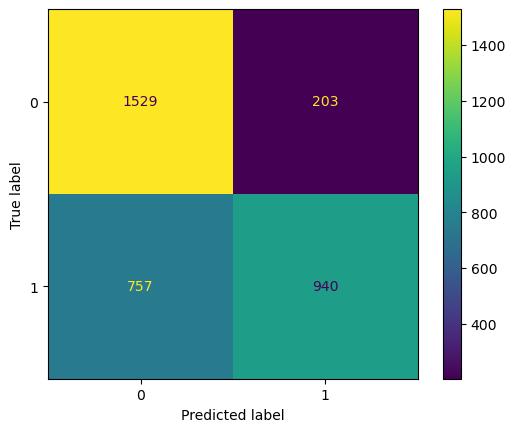

In [21]:
clf = svm.SVC(verbose=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()